In [3]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
print(os.getcwd())

/Users/michaelmeraj/Desktop/projects/Kaggle_dataset_Supercar_price_prediction/notebooks


In [5]:
# # Display options
# pd.set_option('display.max_columns', None)
# sns.set(style="whitegrid")


In [6]:
df = pd.read_csv('../data/raw/Elite_Sports_Cars_in_Data.csv')
df.head()


Brand           Model  Year Country Condition  Engine_Size  Horsepower  \
0     Nissan            720S  2006    Asia      used          3.7         420   
1    McLaren     911 Turbo S  2009  Europe       new          5.3        1104   
2  Chevrolet  M4 Competition  2009     USA       new          5.5         153   
3    Bugatti          Chiron  1982    Asia      used          5.4         544   
4     Nissan          Chiron  2022  Europe       new          2.4         980   

   Torque  Weight  Top_Speed  ...  Mileage Popularity Safety_Rating  \
0     705    1785        238  ...    96664        Low             2   
1     766     992        386  ...   159630       High             2   
2    1573    2022        397  ...   111496       High             1   
3    1009    1091        151  ...   217228       High             2   
4     693    1232        385  ...   150318        Low             3   

  Number_of_Owners  Market_Demand  Insurance_Cost  Production_Units  \
0                4         Medium           13410              5000   
1                2         Medium           10795              1000   
2                2            Low            1716             20000   
3                4         Medium           11618             20000   
4                2         Medium           11324            100000   

   Log_Price Log_Mileage  Modification  
0  11.309352   11.479007        V-Spec  
1  12.639334   11.980620           NaN  
2  12.948902   11.621753           NaN  
3  11.725542   12.288707           NaN  
4  11.229289   11.920515           NaN  

[5 rows x 27 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissions       5000 non-null   int64  
 16  Price 

In [8]:
df.shape


(5000, 27)

In [9]:
df.describe

<bound method NDFrame.describe of           Brand           Model  Year Country Condition  Engine_Size  \
0        Nissan            720S  2006    Asia      used          3.7   
1       McLaren     911 Turbo S  2009  Europe       new          5.3   
2     Chevrolet  M4 Competition  2009     USA       new          5.5   
3       Bugatti          Chiron  1982    Asia      used          5.4   
4        Nissan          Chiron  2022  Europe       new          2.4   
...         ...             ...   ...     ...       ...          ...   
4995     Nissan            GT-R  2011     USA      used          3.9   
4996    McLaren  M4 Competition  2021     USA       new          6.9   
4997    Bugatti     911 Turbo S  1983  Europe       new          6.3   
4998    Porsche  M4 Competition  2023    Asia       new          7.3   
4999    McLaren          Chiron  2018  Europe       new          7.7   

      Horsepower  Torque  Weight  Top_Speed  ...  Mileage Popularity  \
0            420     705    1

In [10]:
df.head(15)["Brand"]

0           Nissan
1          McLaren
2        Chevrolet
3          Bugatti
4           Nissan
5              BMW
6          Porsche
7           Nissan
8        Chevrolet
9          Bugatti
10         McLaren
11       Chevrolet
12       Chevrolet
13         Porsche
14    Aston Martin
Name: Brand, dtype: object

In [11]:
df.tail()["Year"]

4995    2011
4996    2021
4997    1983
4998    2023
4999    2018
Name: Year, dtype: int64

In [12]:
df.tail(10)["Year"]

4990    1999
4991    1985
4992    1987
4993    2024
4994    2013
4995    2011
4996    2021
4997    1983
4998    2023
4999    2018
Name: Year, dtype: int64

In [13]:
df.columns

Index(['Brand', 'Model', 'Year', 'Country', 'Condition', 'Engine_Size',
       'Horsepower', 'Torque', 'Weight', 'Top_Speed', 'Acceleration_0_100',
       'Fuel_Type', 'Drivetrain', 'Transmission', 'Fuel_Efficiency',
       'CO2_Emissions', 'Price', 'Mileage', 'Popularity', 'Safety_Rating',
       'Number_of_Owners', 'Market_Demand', 'Insurance_Cost',
       'Production_Units', 'Log_Price', 'Log_Mileage', 'Modification'],
      dtype='object')

In [14]:
test= df[["Brand","Year","Condition","Horsepower","Mileage","Market_Demand","Production_Units","Price"]].head()


In [15]:
test.head()

Brand  Year Condition  Horsepower  Mileage Market_Demand  \
0     Nissan  2006      used         420    96664        Medium   
1    McLaren  2009       new        1104   159630        Medium   
2  Chevrolet  2009       new         153   111496           Low   
3    Bugatti  1982      used         544   217228        Medium   
4     Nissan  2022       new         980   150318        Medium   

   Production_Units   Price  
0              5000   81580  
1              1000  308455  
2             20000  420374  
3             20000  123690  
4            100000   75303

In [16]:
test_sorted = test.sort_values(by="Year",ascending=True)
test_sorted.head()

Brand  Year Condition  Horsepower  Mileage Market_Demand  \
3    Bugatti  1982      used         544   217228        Medium   
0     Nissan  2006      used         420    96664        Medium   
1    McLaren  2009       new        1104   159630        Medium   
2  Chevrolet  2009       new         153   111496           Low   
4     Nissan  2022       new         980   150318        Medium   

   Production_Units   Price  
3             20000  123690  
0              5000   81580  
1              1000  308455  
2             20000  420374  
4            100000   75303

In [17]:
df_sf = df[["Brand","Year","Condition","Horsepower","Mileage","Market_Demand","Production_Units","Price"]]

In [18]:
df_sf_sorted = df_sf.sort_values(by="Price",ascending=False)

In [19]:
df_sf_sorted.head(10)

Brand  Year Condition  Horsepower  Mileage Market_Demand  \
4109    Ferrari  2017       new        1007   228022          High   
4587    McLaren  2014      used         699   182067          High   
245   Chevrolet  2014   salvage        1112    36607        Medium   
2856     Nissan  1990       new         435   221295          High   
2733    McLaren  2007   salvage         666   160004        Medium   
566         BMW  1986      used        1470   163571           Low   
2151       Ford  1996      used         636   150778        Medium   
1085    Porsche  1998      used        1510   103469        Medium   
4638  Chevrolet  2014      used        1510    95394        Medium   
1293       Ford  2000      used        1177   144899        Medium   

      Production_Units   Price  
4109            100000  499991  
4587            100000  499961  
245               5000  499706  
2856              1000  499674  
2733              1000  499462  
566               5000  499390  
2151               200  499369  
1085              5000  499357  
4638            100000  499311  
1293                50  499256

In [20]:
df["Price"].max()

np.int64(499991)

In [21]:
df.describe()

Year  Engine_Size   Horsepower       Torque       Weight  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2001.904800     4.828700   822.891600   938.800600  1689.724200   
std      12.873697     1.858353   401.362549   472.954278   465.786421   
min    1980.000000     1.600000   130.000000   120.000000   900.000000   
25%    1991.000000     3.200000   472.000000   522.000000  1286.000000   
50%    2002.000000     4.800000   815.500000   948.000000  1684.000000   
75%    2013.000000     6.500000  1176.000000  1345.000000  2101.000000   
max    2024.000000     8.000000  1521.000000  1758.000000  2499.000000   

         Top_Speed  Acceleration_0_100  Fuel_Efficiency  CO2_Emissions  \
count  5000.000000         5000.000000      5000.000000    5000.000000   
mean    274.857000            4.517280        10.038340     272.695200   
std      72.062214            1.448473         2.881613     100.154245   
min     150.000000            2.000000         5.000000     100.000000   
25%     214.000000            3.300000         7.600000     186.000000   
50%     275.000000            4.500000        10.000000     273.000000   
75%     337.000000            5.800000        12.600000     357.000000   
max     399.000000            7.000000        15.000000     449.000000   

               Price        Mileage  Safety_Rating  Number_of_Owners  \
count    5000.000000    5000.000000    5000.000000       5000.000000   
mean   262067.329400  126487.020800       2.502200          2.479200   
std    137678.803906   72773.504601       1.119038          1.114368   
min     20014.000000      47.000000       1.000000          1.000000   
25%    143710.750000   63809.750000       1.000000          1.000000   
50%    265213.500000  126762.500000       3.000000          2.000000   
75%    380923.500000  190287.500000       3.000000          3.000000   
max    499991.000000  249956.000000       4.000000          4.000000   

       Insurance_Cost  Production_Units    Log_Price  Log_Mileage  
count     5000.000000       5000.000000  5000.000000  5000.000000  
mean      7749.857800      26496.010000    12.266985    11.449482  
std       4177.751738      36767.027776     0.741124     0.973881  
min        501.000000         50.000000     9.904237     3.871201  
25%       4106.750000       1000.000000    11.875565    11.063677  
50%       7697.500000       5000.000000    12.488294    11.750078  
75%      11351.750000      20000.000000    12.850356    12.156297  
max      14998.000000     100000.000000    13.122347    12.429044

In [22]:
df_sf_sorted.sort_values(by=["Brand", "Price"], ascending=[True, False])

Brand  Year Condition  Horsepower  Mileage Market_Demand  \
3889  Aston Martin  2000      used         237    35886        Medium   
4085  Aston Martin  1998       new         223    73454           Low   
554   Aston Martin  2003       new        1396    76547        Medium   
932   Aston Martin  2000       new         285   201435        Medium   
3293  Aston Martin  2005       new        1275   152779           Low   
...            ...   ...       ...         ...      ...           ...   
1878       Porsche  1996       new         922   189008          High   
2234       Porsche  2021       new        1075   118398           Low   
4666       Porsche  1993       new         211   111185        Medium   
2158       Porsche  2007      used         309   182971          High   
3804       Porsche  1987  restored        1164    12967        Medium   

      Production_Units   Price  
3889             20000  498595  
4085             20000  498168  
554             100000  497621  
932                 50  497160  
3293            100000  496404  
...                ...     ...  
1878               200   22142  
2234              5000   21817  
4666                50   21341  
2158               200   21227  
3804            100000   20014  

[5000 rows x 8 columns]

In [23]:
# visuals
# makes plots look clean'
sns.set(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (12, 10) 

<Axes: xlabel='Price', ylabel='Count'>

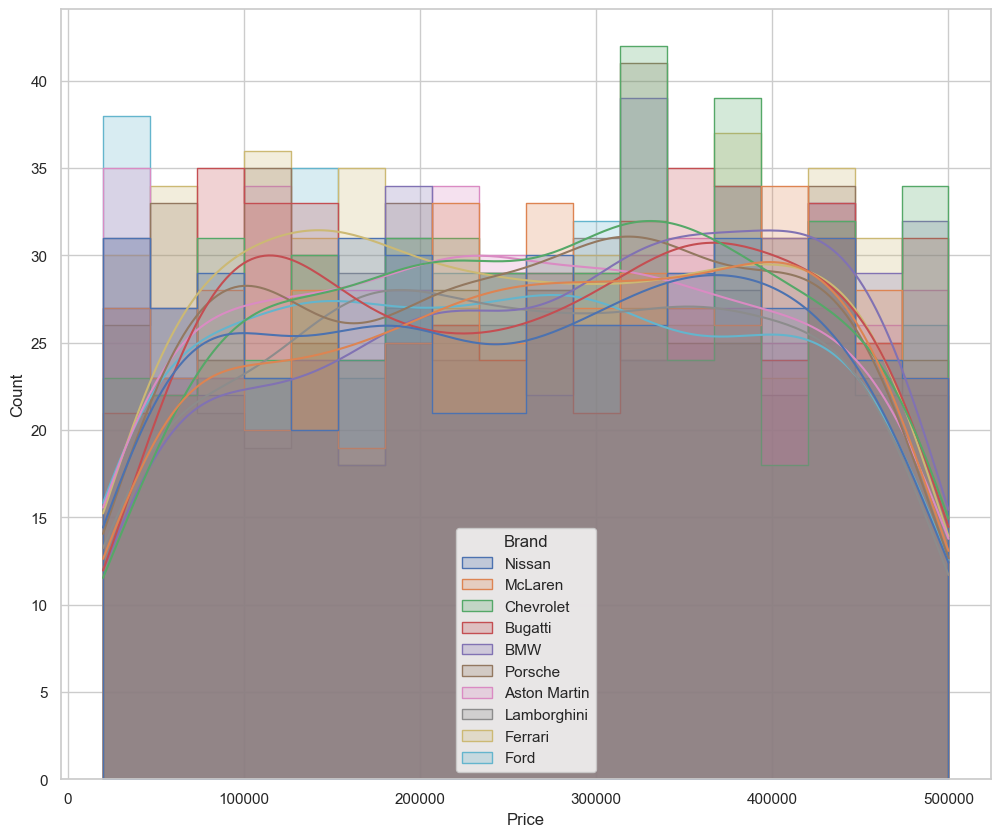

In [32]:
sns.histplot(data=df, x="Price", hue="Brand", kde=True, element="step")


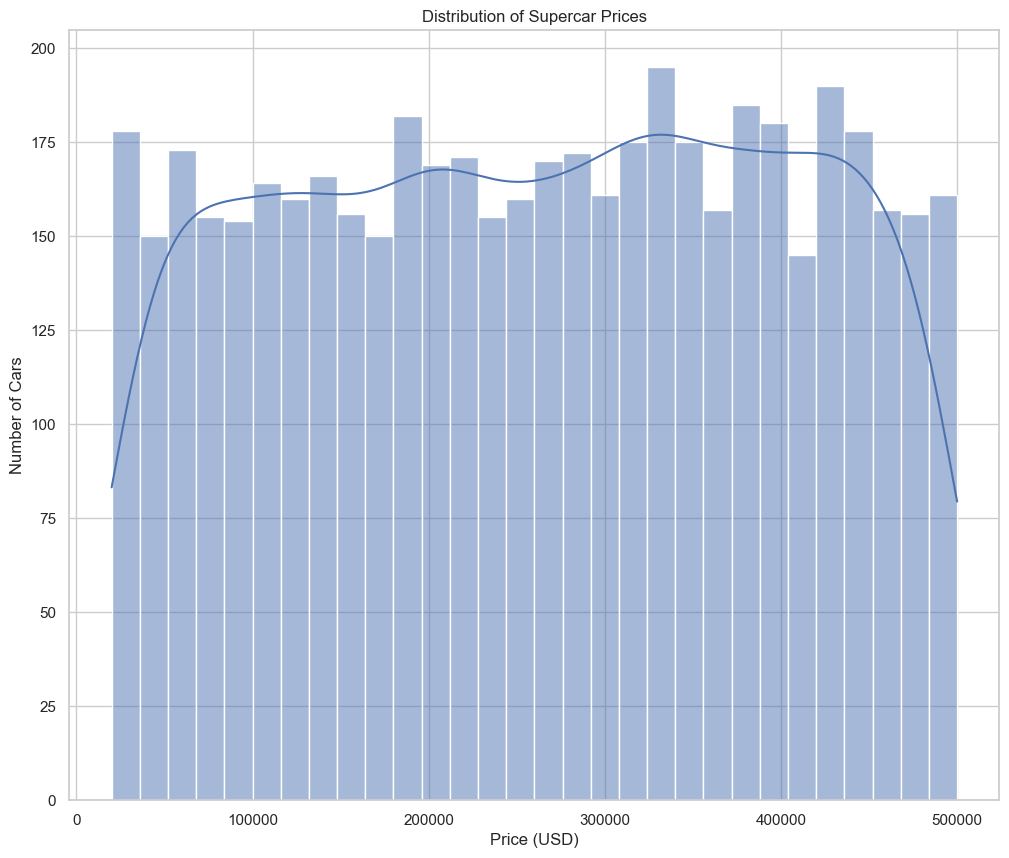

In [34]:
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Distribution of Supercar Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Cars")
plt.show()

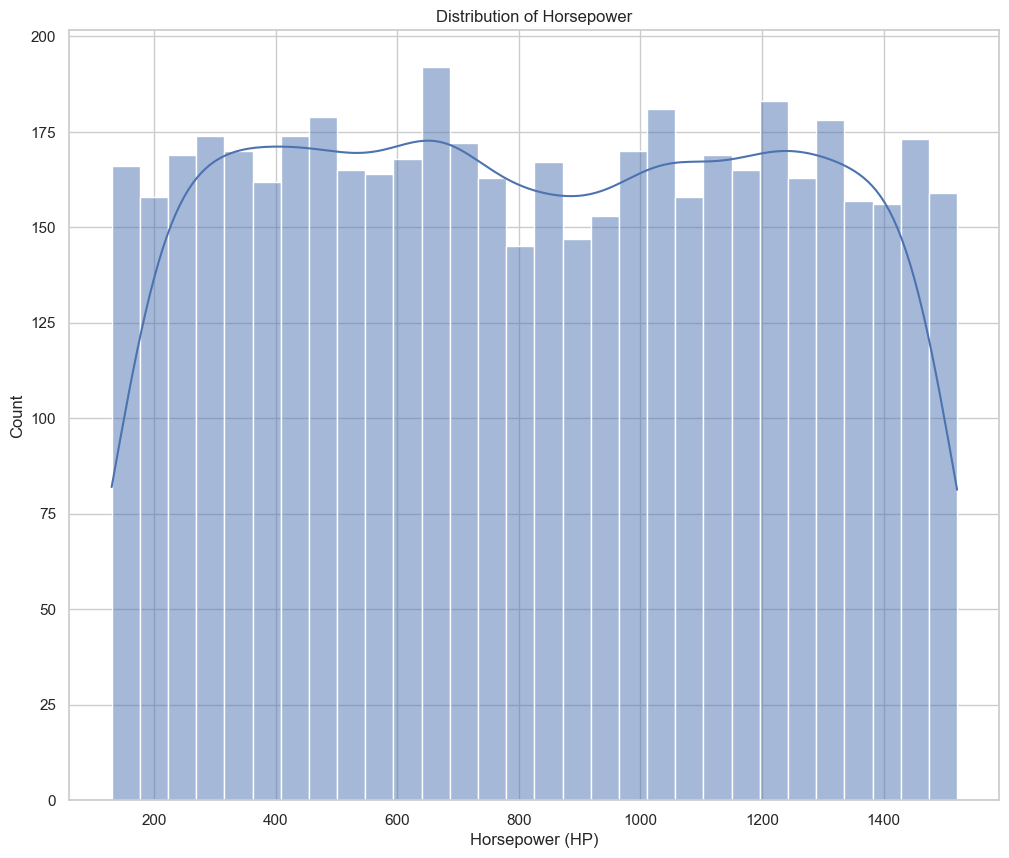

In [33]:
sns.histplot(df["Horsepower"], bins=30, kde=True)
plt.title("Distribution of Horsepower")
plt.xlabel("Horsepower (HP)")
plt.show()

<Axes: xlabel='Mileage', ylabel='Count'>

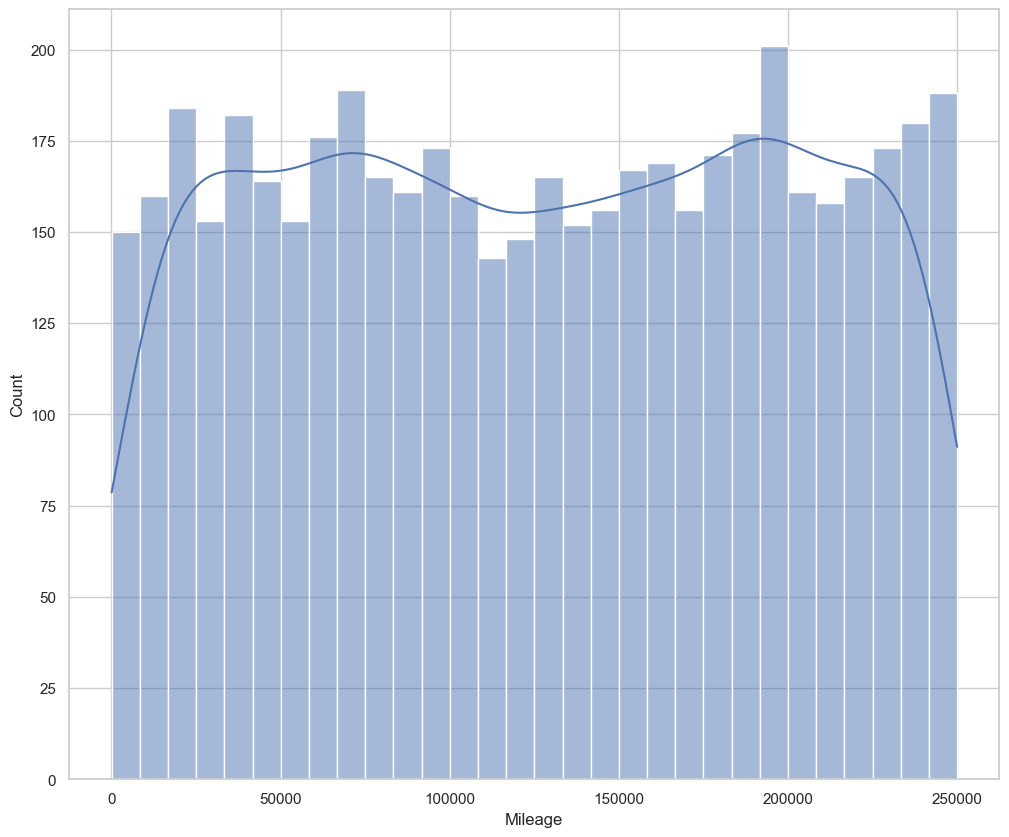

In [35]:
sns.histplot(df["Mileage"], bins=30, kde=True)


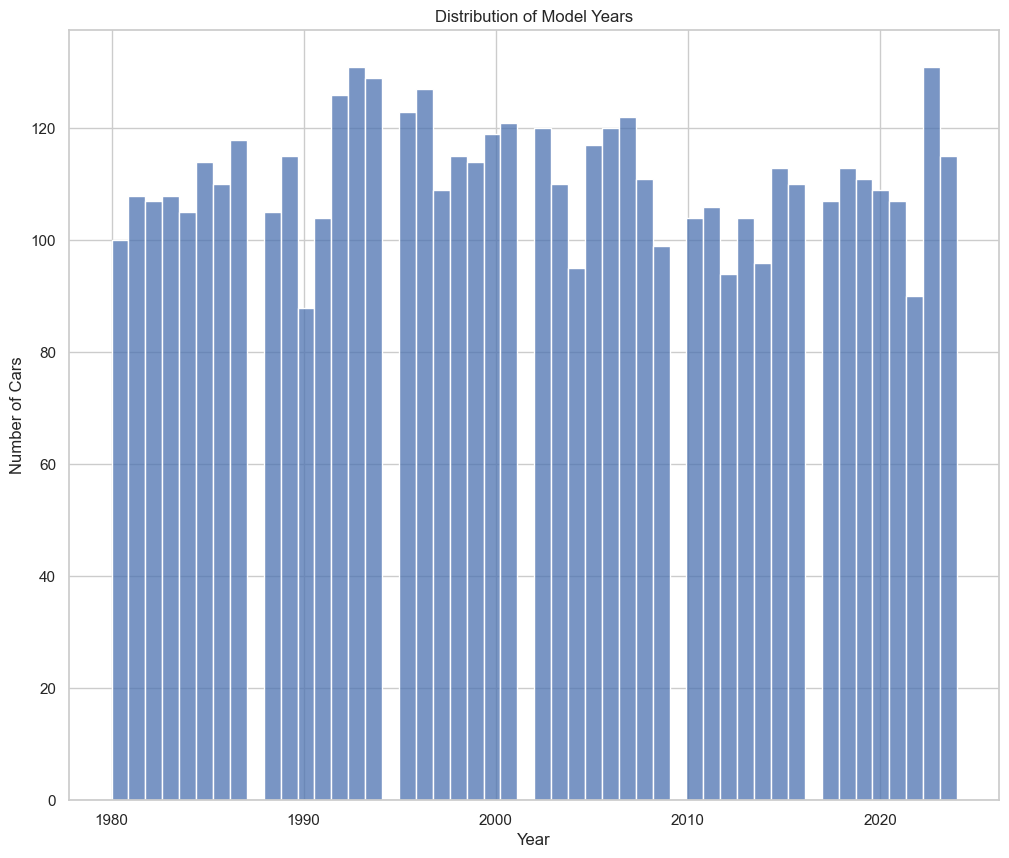

In [40]:
sns.histplot(df["Year"], bins=50, kde=False)
plt.title("Distribution of Model Years")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.show()

In [46]:
df["Year"].isnull().sum()


np.int64(0)

In [47]:
min_year = df["Year"].min()
max_year = df["Year"].max()
print("Earliest Year:", min_year)
print("Latest Year:", max_year)


Earliest Year: 1980
Latest Year: 2024


In [48]:
df["Year"].describe()

count    5000.000000
mean     2001.904800
std        12.873697
min      1980.000000
25%      1991.000000
50%      2002.000000
75%      2013.000000
max      2024.000000
Name: Year, dtype: float64

In [49]:
year_counts = df["Year"].value_counts().sort_index()
print(year_counts)

Year
1980    100
1981    108
1982    107
1983    108
1984    105
1985    114
1986    110
1987    118
1988    105
1989    115
1990     88
1991    104
1992    126
1993    131
1994    129
1995    123
1996    127
1997    109
1998    115
1999    114
2000    119
2001    121
2002    120
2003    110
2004     95
2005    117
2006    120
2007    122
2008    111
2009     99
2010    104
2011    106
2012     94
2013    104
2014     96
2015    113
2016    110
2017    107
2018    113
2019    111
2020    109
2021    107
2022     90
2023    131
2024    115
Name: count, dtype: int64


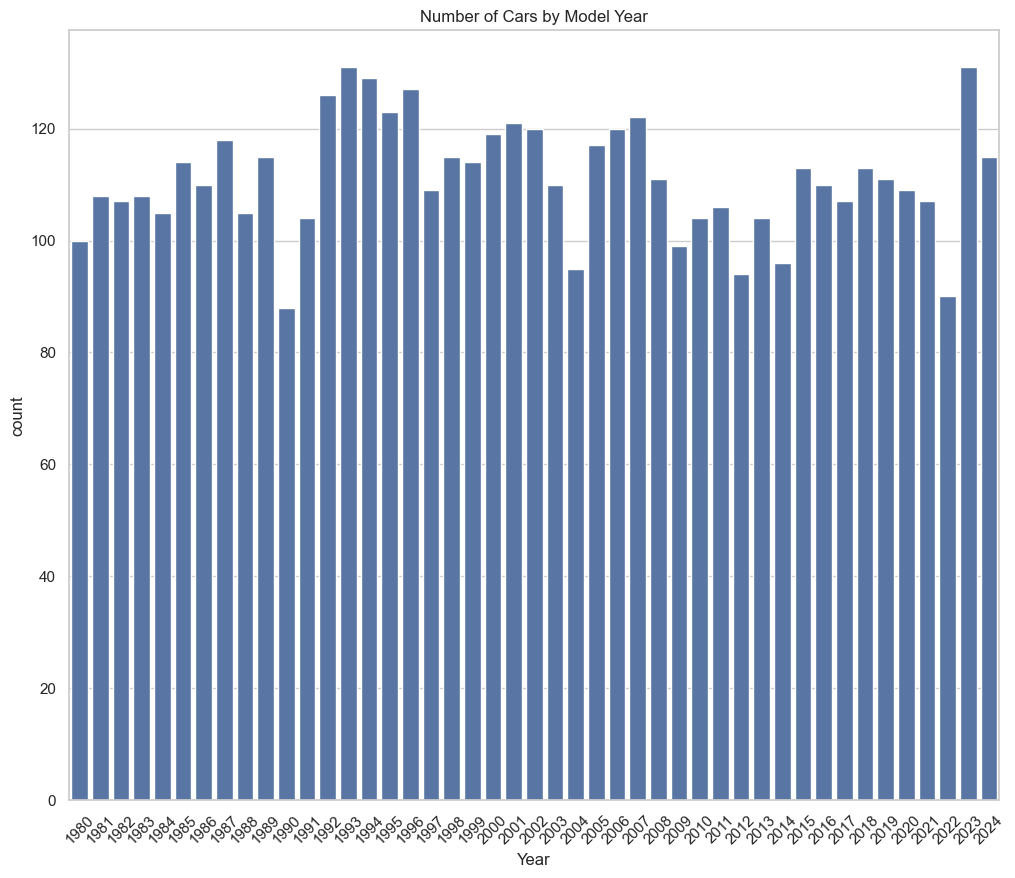

In [50]:
sns.countplot(x="Year", data=df, order=sorted(df["Year"].unique()))
plt.title("Number of Cars by Model Year")
plt.xticks(rotation=45)
plt.show()

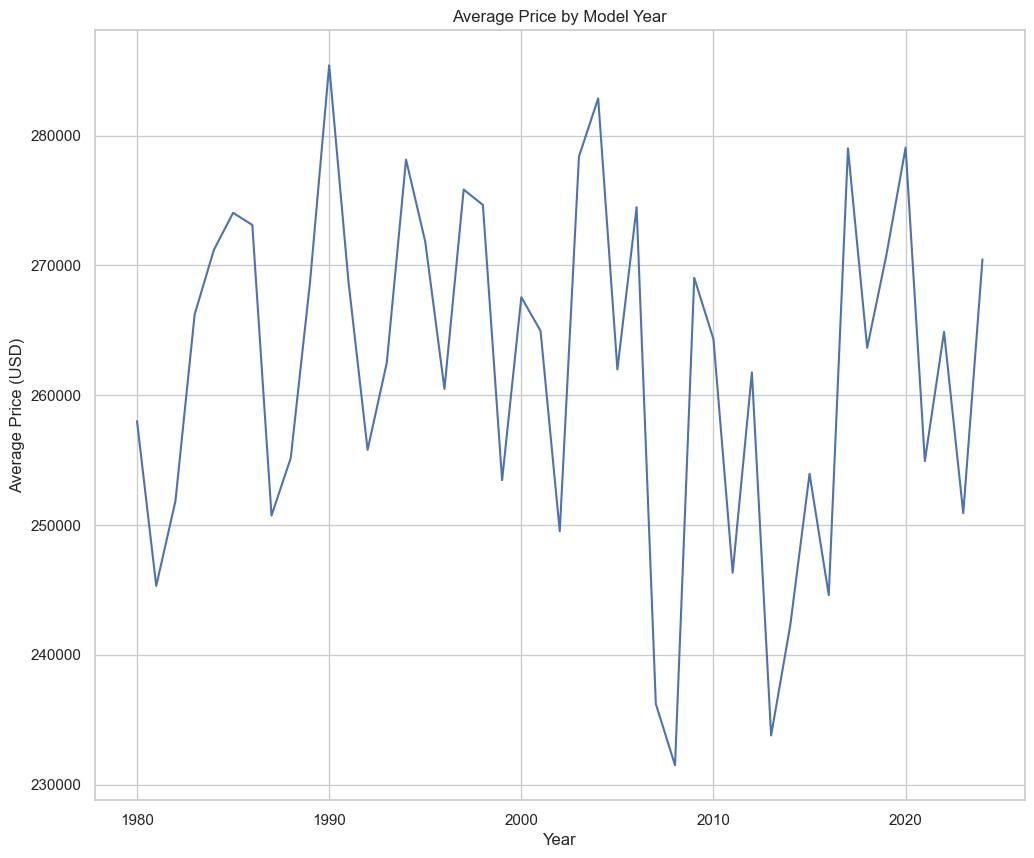

In [51]:
avg_price_per_year = df.groupby("Year")["Price"].mean()
sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values)
plt.title("Average Price by Model Year")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.show()

In [52]:
# exploration of missing values

In [53]:
# Check missing values
df.isnull().sum()

Brand                    0
Model                    0
Year                     0
Country                  0
Condition                0
Engine_Size              0
Horsepower               0
Torque                   0
Weight                   0
Top_Speed                0
Acceleration_0_100       0
Fuel_Type                0
Drivetrain               0
Transmission             0
Fuel_Efficiency          0
CO2_Emissions            0
Price                    0
Mileage                  0
Popularity               0
Safety_Rating            0
Number_of_Owners         0
Market_Demand            0
Insurance_Cost           0
Production_Units         0
Log_Price                0
Log_Mileage              0
Modification          3023
dtype: int64

In [54]:
# Check year range
print("Year range:", df["Year"].min(), "-", df["Year"].max())

Year range: 1980 - 2024


In [56]:
# Check number of cars per year
print(df["Year"].value_counts().sort_index())

Year
1980    100
1981    108
1982    107
1983    108
1984    105
1985    114
1986    110
1987    118
1988    105
1989    115
1990     88
1991    104
1992    126
1993    131
1994    129
1995    123
1996    127
1997    109
1998    115
1999    114
2000    119
2001    121
2002    120
2003    110
2004     95
2005    117
2006    120
2007    122
2008    111
2009     99
2010    104
2011    106
2012     94
2013    104
2014     96
2015    113
2016    110
2017    107
2018    113
2019    111
2020    109
2021    107
2022     90
2023    131
2024    115
Name: count, dtype: int64


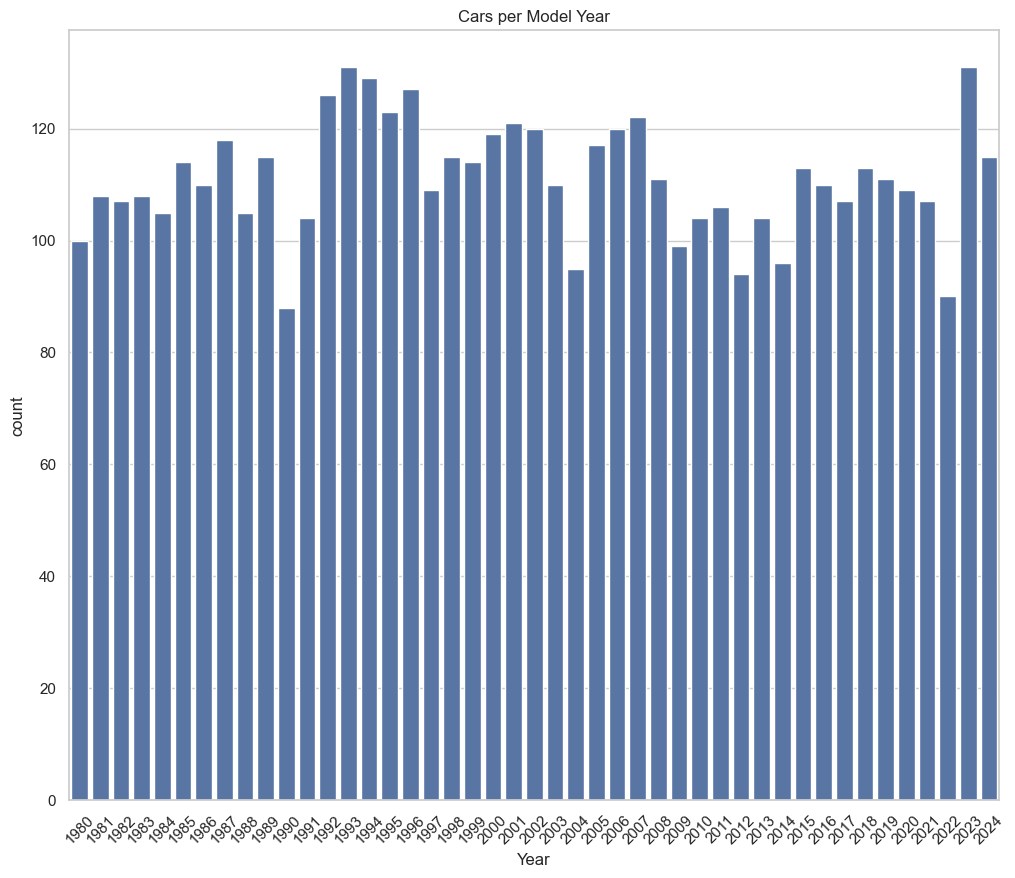

In [57]:

# Quick plot
sns.countplot(x="Year", data=df, order=sorted(df["Year"].unique()))
plt.xticks(rotation=45)
plt.title("Cars per Model Year")
plt.show()

In [58]:
(df == 0).sum() 

Brand                 0
Model                 0
Year                  0
Country               0
Condition             0
Engine_Size           0
Horsepower            0
Torque                0
Weight                0
Top_Speed             0
Acceleration_0_100    0
Fuel_Type             0
Drivetrain            0
Transmission          0
Fuel_Efficiency       0
CO2_Emissions         0
Price                 0
Mileage               0
Popularity            0
Safety_Rating         0
Number_of_Owners      0
Market_Demand         0
Insurance_Cost        0
Production_Units      0
Log_Price             0
Log_Mileage           0
Modification          0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df["Brand"].unique()[:20]

array(['Nissan', 'McLaren', 'Chevrolet', 'Bugatti', 'BMW', 'Porsche',
       'Aston Martin', 'Lamborghini', 'Ferrari', 'Ford'], dtype=object)

In [61]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol      1688
Diesel      1684
Electric    1628
Name: count, dtype: int64

In [63]:
df["Condition"].unique()[:20]

array(['used', 'new', 'salvage', 'restored'], dtype=object)

In [64]:
# outliers

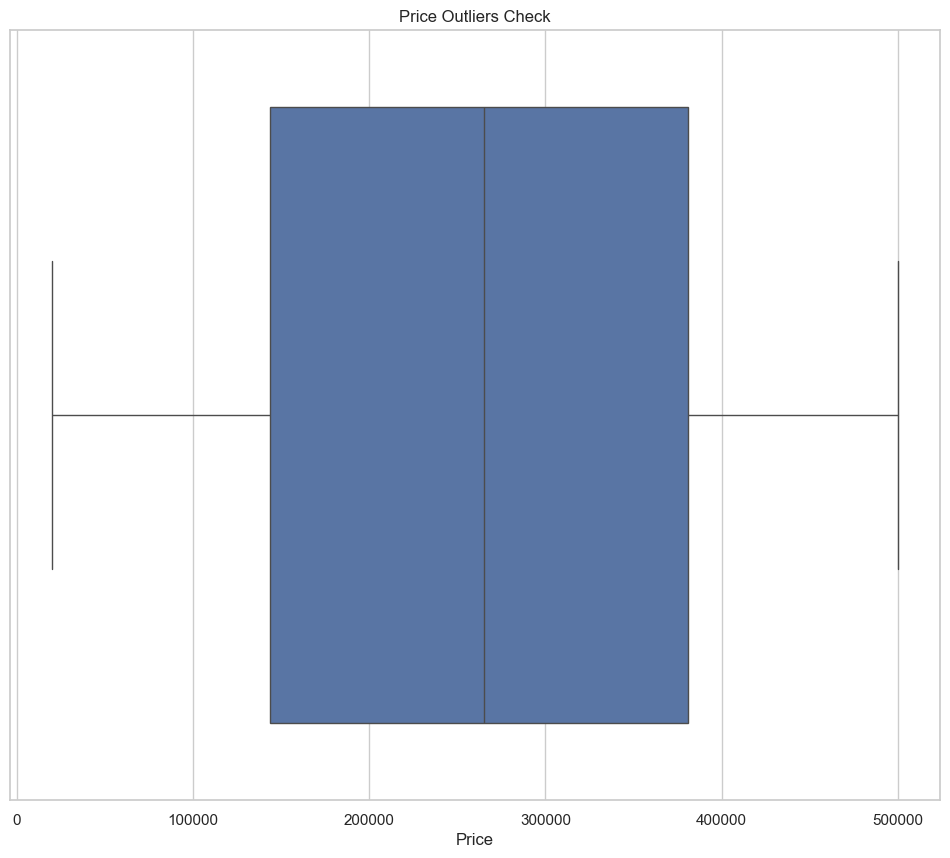

count      5000.000000
mean     262067.329400
std      137678.803906
min       20014.000000
25%      143710.750000
50%      265213.500000
75%      380923.500000
max      499991.000000
Name: Price, dtype: float64

In [66]:
sns.boxplot(x=df["Price"])
plt.title("Price Outliers Check")
plt.show()

df["Price"].describe()